In [18]:
0.02 * (1 - 0.001) ** 1000

0.007353908495419274

In [2]:
import numpy as np
np.__file__

'c:\\users\\indez\\appdata\\local\\programs\\python\\python37\\lib\\site-packages\\numpy\\__init__.py'

In [2]:
cv2.__file__

'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\cv2\\cv2.cp37-win_amd64.pyd'

In [1]:
import tensorflow as tf

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPU


In [3]:
save_file = '/'.join(''.split('/')[:-1])
save_file+'/recent_weights.csv'

'/recent_weights.csv'

In [6]:
def itergroups(items, group_size):
    assert group_size >=1
    group = []
    for x in items:
        group.append(x)
        if len(group) == group_size:
            yield tuple(group)
            del group[:]
    if group:
        yield tuple(group)

In [7]:
items = [0,1,2,3,4,5,6,7,8,9]
items2 = [0,-1,-2,-3,-4,-5,-6,-7,-8,-9]
group_size = 2

test = zip(itergroups(items, group_size), itergroups(items2, group_size))
for bitems1, bitems2 in test:
    print(bitems1)
    print(bitems2)


(0, 1)
(0, -1)
(2, 3)
(-2, -3)
(4, 5)
(-4, -5)
(6, 7)
(-6, -7)
(8, 9)
(-8, -9)


In [13]:
import numpy as np

In [18]:
example_rewards = np.array([[5, -3],
                            [3, -1],
                            [-1, 8],
                            [2, 0] 
                           ])
max_rewards = np.max(example_rewards, axis=1)
max_rewards

array([5, 3, 8, 2])

In [21]:
idx = np.arange(max_rewards.size)[max_rewards >= np.percentile(max_rewards, 50)]
idx

array([0, 2])

In [22]:
2 / (2 * 2) * 2

1.0

In [23]:
2 * 2 / (2 * 2)

1.0

In [25]:
example_rewards.shape

(4, 2)

In [27]:
example_rewards.size

8

In [30]:
gen = (np.random.randn(4) for idx in range(4))
for x in gen:
    print(x)

[-0.1193228   2.52593778 -1.24782013 -1.04969032]
[ 2.06891614  1.16200311 -0.12986442  1.19960347]
[-0.85199425 -0.26435506 -1.12522255 -0.48896149]
[ 0.74035596  0.63619677 -0.01690817  0.68125736]


In [31]:
for x in gen:
    print(x)

In [32]:
def itergroups(items, group_size):
    assert group_size >= 1
    group = []
    for x in items:
        group.append(x)
        if len(group) == group_size:
            yield tuple(group)
            del group[:]
    if group:
        yield tuple(group)


# A little confusing but weights will actually be the pos/neg reward rollout diffs
# and vecs will be the deltas
def batched_weighted_sum(weights, vecs, batch_size):
    total = 0
    num_items_summed = 0
    for batch_weights, batch_vecs in zip(itergroups(weights, batch_size),
                                         itergroups(vecs, batch_size)):
        assert len(batch_weights) == len(batch_vecs) <= batch_size
        total += np.dot(np.asarray(batch_weights, dtype=np.float64),
                        np.asarray(batch_vecs, dtype=np.float64))
        num_items_summed += len(batch_weights)
    return total, num_items_summed

In [35]:
test_deltas = np.random.randn(4, 100)
#test_deltas

In [37]:
bws = batched_weighted_sum(example_rewards[:, 0] - example_rewards[:, 1],
                     test_deltas,
                     batch_size=500
                    )
bws[0] / np.std(example_rewards)

array([  5.31228753,  -5.00374034,   0.88565361,  -4.17552264,
        -2.89444164,   0.17104802,  -1.91836409,   2.93150042,
        -4.74449721,  -3.70812403,   2.72375401,   1.85598627,
         0.65018714,   2.07431468,  -2.97037148,   1.00484963,
         0.62889759,   6.08719464,   2.45558551,  -0.07938536,
        -6.38126905,  -0.54242587,   5.5312811 ,   0.3356497 ,
         3.45150283,   3.10658036,   0.12469049,  -4.14143515,
         3.85861293,  -0.25056802,   3.7950614 ,   2.18421964,
         2.52899162,  -2.1412793 ,  -2.85097136,   0.1414185 ,
         6.61362681,   1.40509377,  -1.96105728,   5.1025909 ,
        -1.97494153,   3.21711028,   0.5277191 ,  -7.43925011,
         0.32444746, -10.69638367,  -3.81998787,   3.44414669,
         3.58368658,  -3.26350543,   2.62187932,  -0.37992821,
         1.6765908 ,   8.75206462,   5.73284763,   0.43715255,
         0.08244689,  -9.07097474,  -7.10717088,  -5.92948131,
         4.88299446,   3.42381331,   1.98120492,  -2.31

In [38]:
std = np.std(example_rewards)
bws = batched_weighted_sum((example_rewards[:, 0]/std) - (example_rewards[:, 1]/std),
                     test_deltas,
                     batch_size=500
                    )
bws[0]

array([  5.31228753,  -5.00374034,   0.88565361,  -4.17552264,
        -2.89444164,   0.17104802,  -1.91836409,   2.93150042,
        -4.74449721,  -3.70812403,   2.72375401,   1.85598627,
         0.65018714,   2.07431468,  -2.97037148,   1.00484963,
         0.62889759,   6.08719464,   2.45558551,  -0.07938536,
        -6.38126905,  -0.54242587,   5.5312811 ,   0.3356497 ,
         3.45150283,   3.10658036,   0.12469049,  -4.14143515,
         3.85861293,  -0.25056802,   3.7950614 ,   2.18421964,
         2.52899162,  -2.1412793 ,  -2.85097136,   0.1414185 ,
         6.61362681,   1.40509377,  -1.96105728,   5.1025909 ,
        -1.97494153,   3.21711028,   0.5277191 ,  -7.43925011,
         0.32444746, -10.69638367,  -3.81998787,   3.44414669,
         3.58368658,  -3.26350543,   2.62187932,  -0.37992821,
         1.6765908 ,   8.75206462,   5.73284763,   0.43715255,
         0.08244689,  -9.07097474,  -7.10717088,  -5.92948131,
         4.88299446,   3.42381331,   1.98120492,  -2.31

In [43]:
rollouts = zip(example_rewards[:, 0], example_rewards[:, 1], test_deltas)
step = np.zeros(test_deltas[0].shape)
for r_pos, r_neg, delta in rollouts:
    step += (r_pos - r_neg) * delta
step / np.std(example_rewards)

array([  5.31228753,  -5.00374034,   0.88565361,  -4.17552264,
        -2.89444164,   0.17104802,  -1.91836409,   2.93150042,
        -4.74449721,  -3.70812403,   2.72375401,   1.85598627,
         0.65018714,   2.07431468,  -2.97037148,   1.00484963,
         0.62889759,   6.08719464,   2.45558551,  -0.07938536,
        -6.38126905,  -0.54242587,   5.5312811 ,   0.3356497 ,
         3.45150283,   3.10658036,   0.12469049,  -4.14143515,
         3.85861293,  -0.25056802,   3.7950614 ,   2.18421964,
         2.52899162,  -2.1412793 ,  -2.85097136,   0.1414185 ,
         6.61362681,   1.40509377,  -1.96105728,   5.1025909 ,
        -1.97494153,   3.21711028,   0.5277191 ,  -7.43925011,
         0.32444746, -10.69638367,  -3.81998787,   3.44414669,
         3.58368658,  -3.26350543,   2.62187932,  -0.37992821,
         1.6765908 ,   8.75206462,   5.73284763,   0.43715255,
         0.08244689,  -9.07097474,  -7.10717088,  -5.92948131,
         4.88299446,   3.42381331,   1.98120492,  -2.31

In [53]:
reward_diffs = example_rewards[:, 0] - example_rewards[:, 1]
reward_diffs = reward_diffs.astype('float64')
reward_diffs /= np.std(example_rewards)
np.dot(reward_diffs, test_deltas)

array([  5.31228753,  -5.00374034,   0.88565361,  -4.17552264,
        -2.89444164,   0.17104802,  -1.91836409,   2.93150042,
        -4.74449721,  -3.70812403,   2.72375401,   1.85598627,
         0.65018714,   2.07431468,  -2.97037148,   1.00484963,
         0.62889759,   6.08719464,   2.45558551,  -0.07938536,
        -6.38126905,  -0.54242587,   5.5312811 ,   0.3356497 ,
         3.45150283,   3.10658036,   0.12469049,  -4.14143515,
         3.85861293,  -0.25056802,   3.7950614 ,   2.18421964,
         2.52899162,  -2.1412793 ,  -2.85097136,   0.1414185 ,
         6.61362681,   1.40509377,  -1.96105728,   5.1025909 ,
        -1.97494153,   3.21711028,   0.5277191 ,  -7.43925011,
         0.32444746, -10.69638367,  -3.81998787,   3.44414669,
         3.58368658,  -3.26350543,   2.62187932,  -0.37992821,
         1.6765908 ,   8.75206462,   5.73284763,   0.43715255,
         0.08244689,  -9.07097474,  -7.10717088,  -5.92948131,
         4.88299446,   3.42381331,   1.98120492,  -2.31

In [62]:
weights = np.load('ARS/data/old_logs/2020-12-12_100steps/lin_policy_plus.npz')['arr_0']

In [63]:
weights.shape

(3, 25088)

In [61]:
weights['arr_0'].shape

(3, 25088)

In [73]:
0.05 * (1 - 0.001)**2000

0.006759996269874973

In [78]:
lr = 0.05
lr_decay = 0.001
for i in range(1000):
    lr *= (1 - lr_decay)
lr

0.01838477123854821

In [76]:
delta_std = 0.10
std_decay = 0.001
for i in range(1000):
    delta_std *= (1 - std_decay)
delta_std

0.03676954247709642

In [ ]:
np.savez('test_z')

In [ ]:
np.savez()

In [48]:
x = 6
x /= 2
x

3.0

In [41]:
for r_pos, r_neg, delta in rollouts:
    print(r_pos, r_neg, delta)
    break

3 -1 [ 1.1066567   0.91289145 -0.1539207  -0.07371567  0.08888667  0.47121829
 -0.02143855  0.06510465 -1.34435679 -1.69600387  0.69213999  0.43700361
  0.48441695 -1.80555939  0.69684916 -0.09025077  0.5332105   1.70435652
  0.34439922 -0.39391742 -0.39865418 -0.60973579 -0.11380823  0.79404425
  0.52088766 -0.20320944  0.74283608 -0.50391761  0.16505276 -0.61370162
 -0.02175533 -0.9410394  -0.4949213  -0.49500357 -2.41369742  1.07814457
  1.29609062  0.20356674 -0.17870439  0.49235338 -0.07119859 -0.15074706
 -0.01741328 -0.08970736 -0.7108177  -0.2167891  -1.30826551 -0.42097034
  1.95861563 -1.43424503  0.14329584  1.23941133 -0.49317929 -0.5907352
  1.01007137  0.81647683 -0.26853871 -1.68928711 -1.68807957 -0.94827067
 -0.39572226  1.32539353 -1.10979767  0.13589866  0.04863936 -2.00582114
  0.71653367  0.40083328  2.27289712  1.12584434  1.32583449  0.9743757
 -2.21676902 -0.38170108 -0.76104658 -2.28868096 -0.85367658 -0.95854993
 -1.87380835 -0.28885562 -0.75869922 -1.58048584

In [26]:
np.std(list(example_rewards[:, 0]) + list(example_rewards[:, 1]))

3.3888604279314896

In [24]:
np.std(example_rewards)

3.3888604279314896

In [8]:
for bitems1, bitems2 in test:
    print(bitems1)
    print(bitems2)

In [11]:
i = 1
items[i:i + 3]

[1, 2, 3]

In [2]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:
gpus

[]

In [6]:
tf.test.gpu_device_name()

''

In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus[0]

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')

In [4]:
gpu_memory_limit = [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5044)]
try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], gpu_memory_limit)
except Exception as e:
    raise e

In [5]:
from keras.applications import VGG19

In [6]:
base_model = VGG19(weights='imagenet',
                   include_top=False,
                   input_shape=(224,
                                224,
                                3
                               )
                   )
base_model.input_shape

(None, 224, 224, 3)

In [7]:
import numpy as np

In [9]:
train_images = np.genfromtxt('train_images/2020-12-10.csv', delimiter=',')

In [10]:
train_images[0].dtype

dtype('float64')

In [11]:
train_images[0].reshape(224, 224, 3).max()

255.0

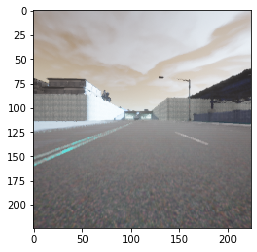

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(train_images[5].reshape(224, 224, 3)/255.)

In [13]:
import datetime
start = datetime.datetime.now()
prediction = base_model.predict(train_images[0].reshape(1, 224, 224, 3)/255.)
end = datetime.datetime.now()
end-start

datetime.timedelta(seconds=1, microseconds=216112)

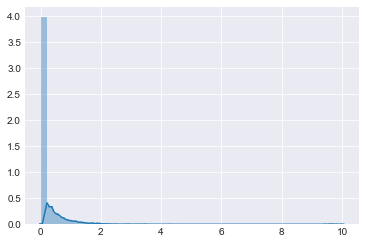

In [14]:
plt.style.use('seaborn-darkgrid')
import seaborn as sns

sns.distplot(prediction.flatten())

In [16]:
(prediction.flatten() / 10).std()

0.05583871

In [14]:
predictions = [base_model.predict(train_images[i].reshape(1, 224, 224, 3)/255.) for i in range(len(train_images))]

In [16]:
plt.style.use('ggplot')

(array([2.4034e+04, 8.5000e+02, 1.1700e+02, 3.4000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9000e+01]),
 array([0.        , 0.10045873, 0.20091745, 0.3013762 , 0.4018349 ,
        0.50229365, 0.6027524 , 0.7032111 , 0.8036698 , 0.90412855,
        1.0045873 ], dtype=float32),
 <a list of 10 Patch objects>)

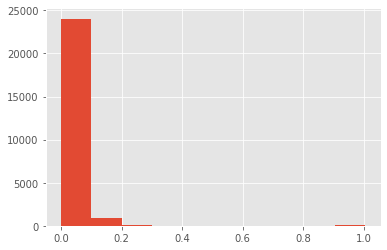

In [25]:
plt.hist(prediction.flatten() / 10)

(array([1.7855e+04, 1.7300e+02, 7.7900e+02, 1.7830e+03, 2.4280e+03,
        1.4340e+03, 4.9700e+02, 8.7000e+01, 3.0000e+00, 4.9000e+01]),
 array([0.        , 0.17803153, 0.35606307, 0.5340946 , 0.71212614,
        0.89015764, 1.0681891 , 1.2462207 , 1.4242523 , 1.6022837 ,
        1.7803153 ], dtype=float32),
 <a list of 10 Patch objects>)

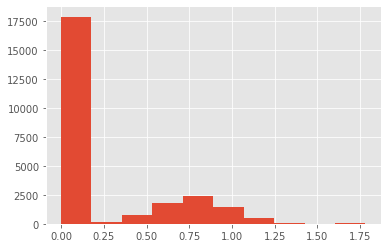

In [24]:
plt.hist(prediction.flatten() ** (1/4))

(array([2.4034e+04, 8.5000e+02, 1.1700e+02, 3.4000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 4.9000e+01]),
 array([-0.29970452,  1.4993829 ,  3.2984703 ,  5.0975575 ,  6.896645  ,
         8.695733  , 10.49482   , 12.293907  , 14.092995  , 15.892082  ,
        17.69117   ], dtype=float32),
 <a list of 10 Patch objects>)

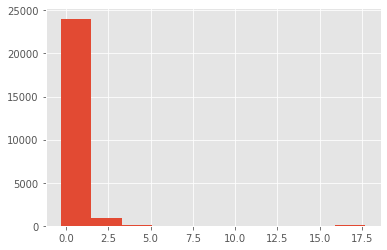

In [23]:
plt.hist((prediction.flatten() - prediction.flatten().mean())/prediction.flatten().std())

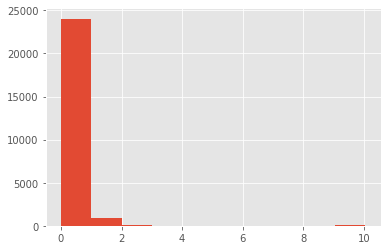

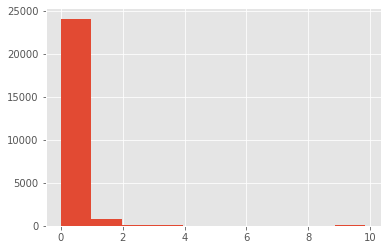

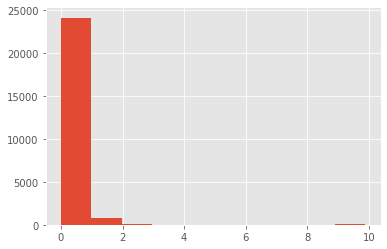

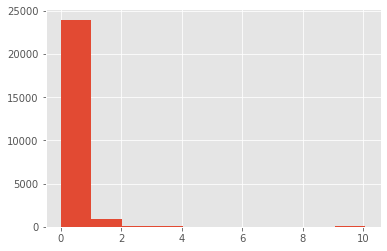

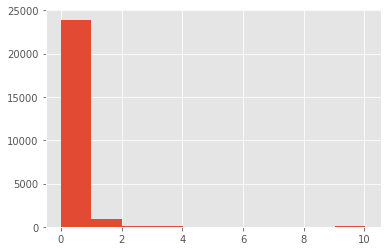

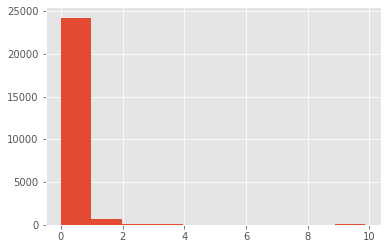

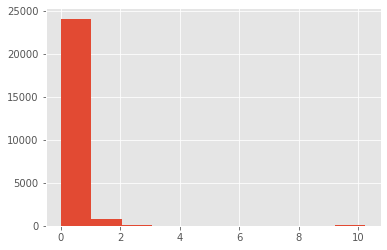

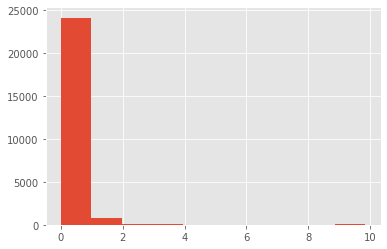

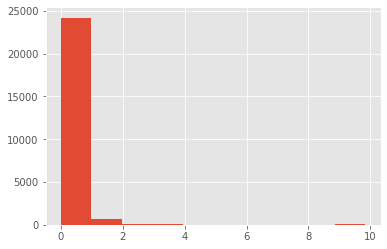

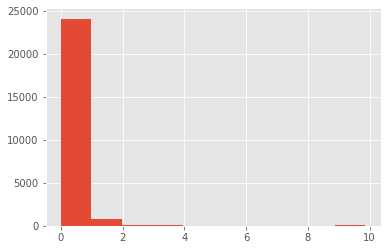

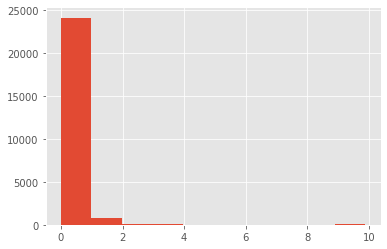

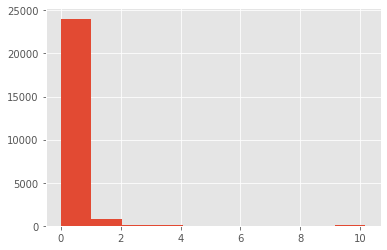

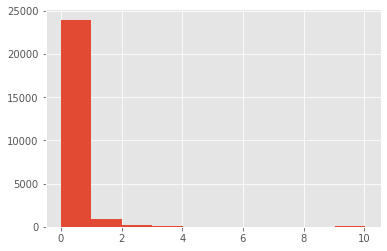

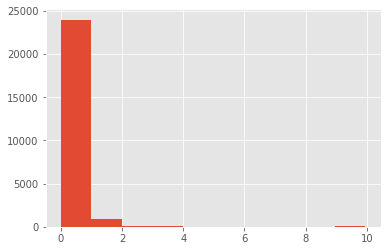

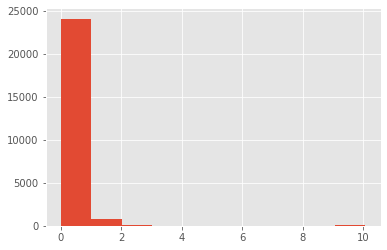

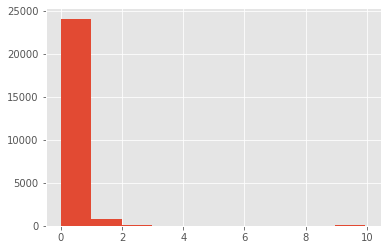

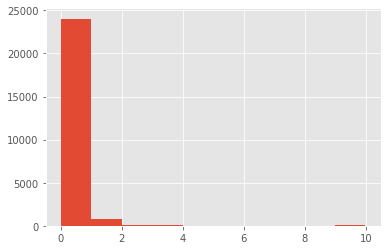

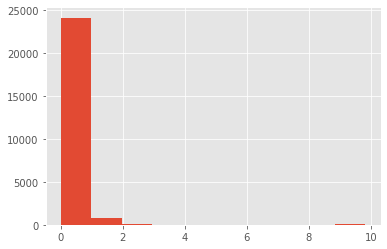

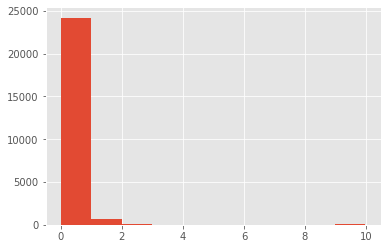

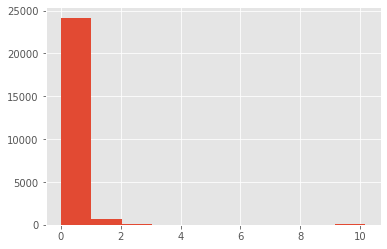

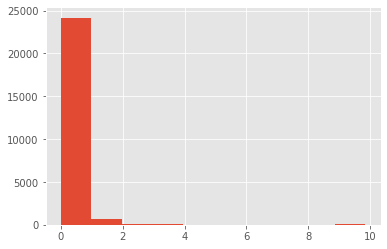

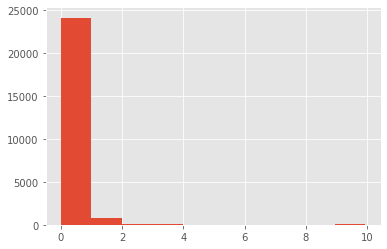

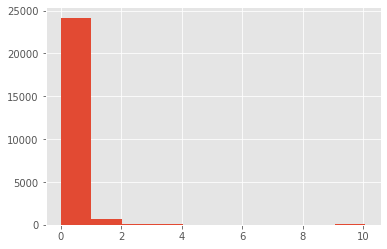

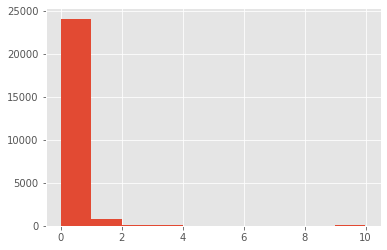

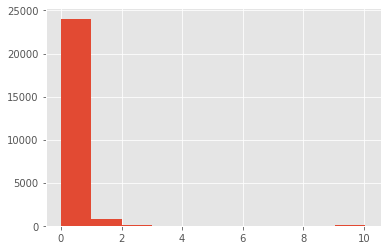

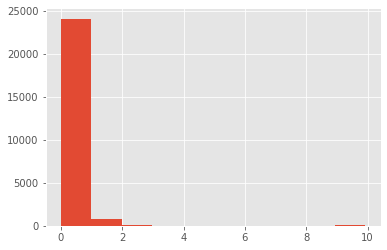

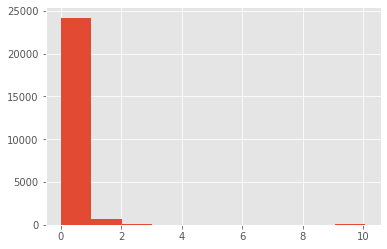

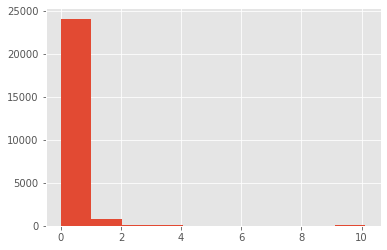

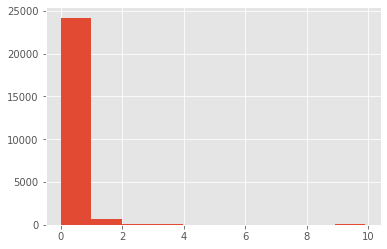

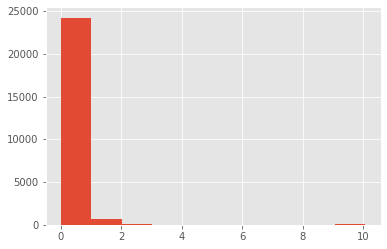

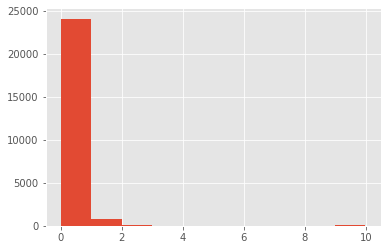

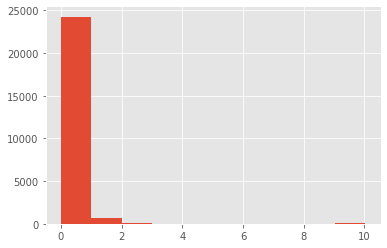

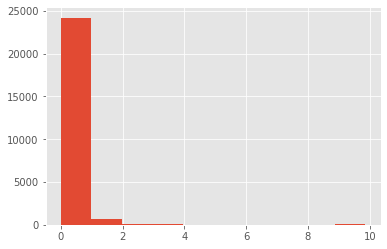

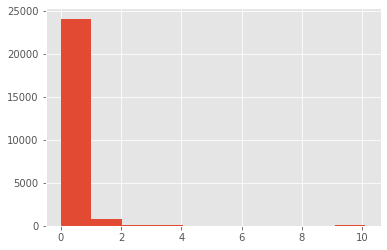

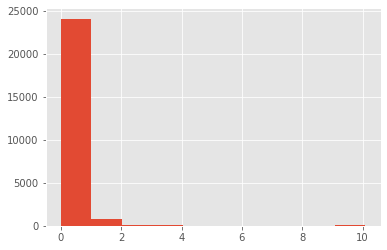

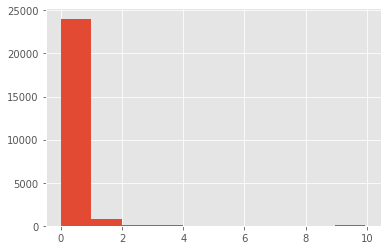

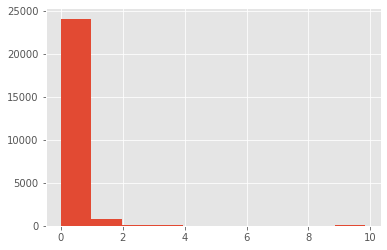

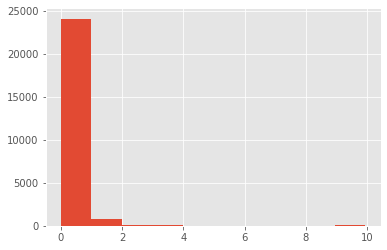

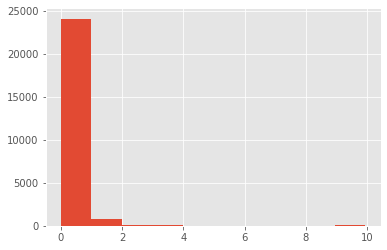

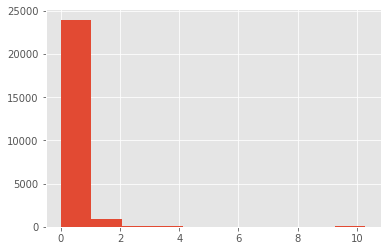

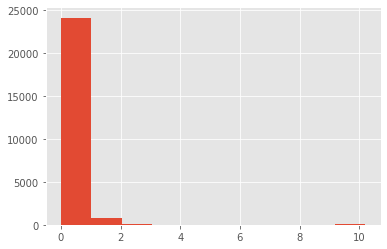

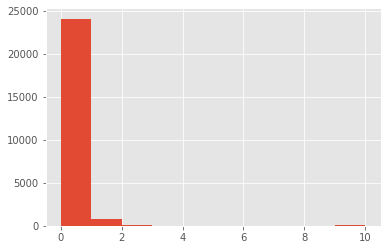

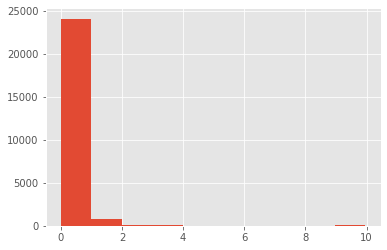

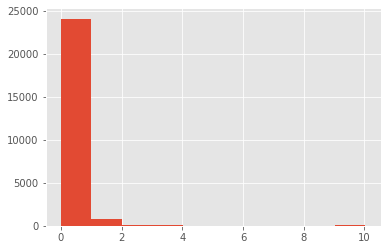

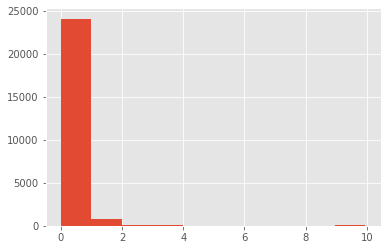

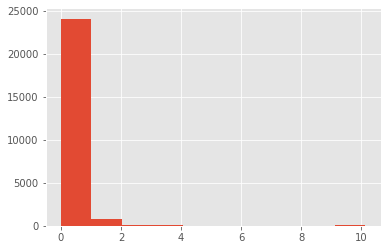

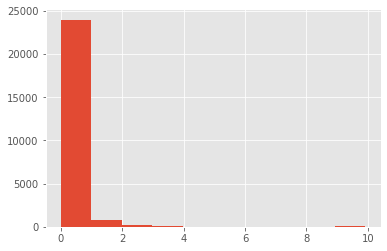

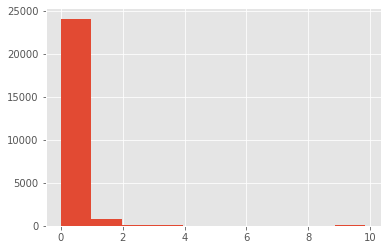

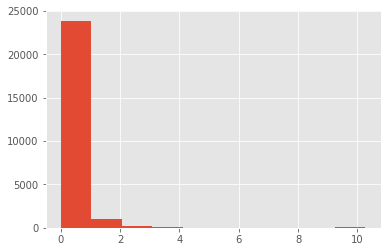

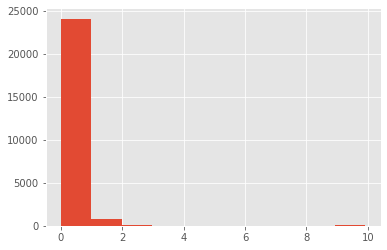

In [17]:
for pred in predictions:
    plt.hist(pred.flatten())
    plt.show()

In [26]:
for pred in predictions:
    print(np.max(pred))

10.045873
9.849289
9.880454
10.077576
10.028415
9.86633
10.230021
9.840568
9.839998
9.862705
9.876434
10.174614
10.032934
9.952502
10.068657
9.948539
9.97952
9.824953
9.976485
10.180575
9.845822
9.943361
10.073884
9.9905405
10.047488
9.926938
10.068335
10.124801
9.901295
10.0696745
9.980918
10.031202
9.85688
10.100816
10.090127
9.949251
9.836839
9.943576
9.940883
10.285727
10.204807
10.013161
9.959014
10.026071
9.953099
10.138107
9.916615
9.840694
10.269006
9.915391


In [28]:
np.array(predictions).flatten().min()

0.0

In [ ]:
# It looks as though our VGG19 gives us outputs which are between zero and just over 10.
# I think that dividing these values by 10, much as we do with the RGB values from the camera,
# would be most appropriate for training our ARS agent.

In [29]:
import ray

In [30]:
ray.utils.get_system_memory()

68588965888

## Exploring Parallel Processing options

In [1]:
from concurrent.futures import ProcessPoolExecutor

In [ ]:
from concurrent.futures import ThreadPoolExecutor

In [93]:
def return_number(number):
    return number

In [90]:
pool = ProcessPoolExecutor(3)
 
pool.map(return_number, list(range(3)))

In [91]:
x.gi_running

False

In [23]:
import ipyparallel as ipp

In [26]:
c = ipp.Client()
c.ids

[0, 1, 2, 3]

In [71]:
c[:].use_pickle(False)

TypeError: use_pickle() takes 1 positional argument but 2 were given

In [94]:
c[:].map_sync(return_number, range(4))

[0, 1, 2, 3]

In [37]:
c[:].apply_sync(return_number, list(range(4)))

<AsyncResult: return_number>

In [10]:
import threading

In [136]:
class FakeDatabase():
    def __init__(self):
        self.value = 0
        #self._lock = threading.Lock()
        
    def update(self, value):
        #with self._lock:
        local_copy = self.value
        local_copy += value
        self.value = local_copy
        
    def run(self, c):
        c[:].map_sync(self.update, range(4))
        
    def return_number(self, number):
        return number
    
    def return_number2(self, number, inc):
        return number + inc, 'a'
    
    def print_something(self):
        print(5)

In [137]:
fakedb = FakeDatabase()

In [138]:
fakedb.run(c)

In [139]:
fakedb.value

0

In [140]:
lamfxn = lambda a: fakedb.return_number2(a, 2)

In [141]:
c[:].map_sync(lamfxn, range(4))

[(2, 'a'), (3, 'a'), (4, 'a'), (5, 'a')]

In [146]:
'/'.join('/adsof/aldsf/slkf.csv'.split('/')[:-1])

'/adsof/aldsf'

In [147]:
import redis

In [148]:
redis.__version__

'3.3.2'

In [ ]:
import math

In [142]:
from filter import get_filter

ModuleNotFoundError: No module named 'filter'

In [112]:
start = datetime.datetime.now()
test_list = []
for i in range(10):
    test_list.append(return_number(i))
print(test_list)
end = datetime.datetime.now()
end-start

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


datetime.timedelta(0)

In [113]:
start = datetime.datetime.now()
x = c[:].map_sync(return_number, range(10))
print(x)
end = datetime.datetime.now()
end-start

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


datetime.timedelta(microseconds=43004)

In [101]:
fakedb.value

0

In [122]:
def thru(obj):
    return obj.return_number(5)

In [123]:
def do_thing(objects):
    return c[:].map_sync(thru, objects)

In [124]:
obj_list = [FakeDatabase() for i in range(4)]

In [125]:
do_thing(obj_list)

[5, 5, 5, 5]

In [73]:
fakedb = FakeDatabase()

In [74]:
fakedb.return_number(6)

6

In [62]:
fakedb.run(c)

In [63]:
fakedb.value

0

In [98]:
c[:].use_cloudpickle()

<AsyncResult: use_cloudpickle>

In [99]:
x = c[:].map_async(fakedb.return_number, range(4))
x.get()

[0, 1, 2, 3]

In [70]:
fakedb.value

0

In [1]:
import ray

In [4]:
!ray start --help

Usage: ray start [OPTIONS]

  Start Ray processes manually on the local machine.

Options:
  --node-ip-address TEXT          the IP address of this node
  --address TEXT                  the address to use for Ray
  --port INTEGER                  the port of the head ray process. If not
                                  provided, defaults to 6379; if port is set
                                  to 0, we will allocate an available port.
  --redis-shard-ports TEXT        the port to use for the Redis shards other
                                  than the primary Redis shard
  --object-manager-port INTEGER   the port to use for starting the object
                                  manager
  --node-manager-port INTEGER     the port to use for starting the node
                                  manager
  --gcs-server-port INTEGER       Port number for the GCS server.
  --min-worker-port INTEGER       the lowest port number that workers will
                                  bind on. If n

In [5]:
!ray --help

Usage: ray [OPTIONS] COMMAND [ARGS]...

Options:
  --logging-level TEXT   The logging level threshold, choices=['debug',
                         'info', 'warning', 'error', 'critical'],
                         default='info'
  --logging-format TEXT  The logging format. default='%(asctime)s
                         %(levelname)s %(filename)s:%(lineno)s -- %(message)s'
  --version              Show the version and exit.
  --help                 Show this message and exit.

Commands:
  attach           Create or attach to a SSH session to a Ray cluster.
  dashboard        Port-forward a Ray cluster's dashboard to the local...
  down             Tear down a Ray cluster.
  exec             Execute a command via SSH on a Ray cluster.
  get-head-ip      Return the head node IP of a Ray cluster.
  get-worker-ips   Return the list of worker IPs of a Ray cluster.
  install-nightly  Install the latest wheels for Ray.
  memory           Print object references held in a Ray cluster.
  microbench

In [7]:
!ray start --head --num-cpus=7 --num-gpus=1

2020-12-09 00:28:31,832	INFO scripts.py:467 -- Local node IP: 192.168.1.2


Traceback (most recent call last):
  File "c:\programdata\anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "c:\programdata\anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\Scripts\ray.exe\__main__.py", line 9, in <module>
  File "c:\programdata\anaconda3\lib\site-packages\ray\scripts\scripts.py", line 1468, in main
    return cli()
  File "c:\programdata\anaconda3\lib\site-packages\click\core.py", line 764, in __call__
    return self.main(*args, **kwargs)
  File "c:\programdata\anaconda3\lib\site-packages\click\core.py", line 717, in main
    rv = self.invoke(ctx)
  File "c:\programdata\anaconda3\lib\site-packages\click\core.py", line 1137, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "c:\programdata\anaconda3\lib\site-packages\click\core.py", line 956, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "c:\programdata\anaconda3\lib\site

In [8]:
ray.init()

AssertionError: 

In [10]:
import redis


queried_value = None
try:
    # Generate the connection
    r = redis.Redis(host='127.0.0.1', port=6379)

    # Set and retrieve the same key
    r.set('test_key', 'This is a test value for showing redis connectivity')
    queried_value = r.get('test_key')
except Exception as e:
    print(f'Unable to connect or execute commands on Redis server: {e}')

In [ ]:
r.

In [15]:
ray.init(address='127.0.0.1:6379')

2020-12-09 13:35:36,332	INFO worker.py:651 -- Connecting to existing Ray cluster at address: 192.168.1.2:6379


ConnectionError: Error 10061 connecting to 192.168.1.2:6379. No connection could be made because the target machine actively refused it.